In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_df = pd.read_excel('m4-yolcu.xlsx')

In [3]:
raw_df

,fusedyear,fusedmonth,fusedday,fusedhour,toplam_yolcu
0,2020,1,1,0,3660
1,2020,1,1,1,3727
2,2020,1,1,2,2499
3,2020,1,1,3,1598
4,2020,1,1,4,1114
...,...,...,...,...,...
20953,2022,7,30,19,12332
20954,2022,7,30,20,9754
20955,2022,7,30,21,8403
20956,2022,7,30,22,7497


In [4]:
raw_df.drop(raw_df[raw_df['fusedhour']==1].index,axis=0,inplace=True)
raw_df.drop(raw_df[raw_df['fusedhour']==2].index,axis=0,inplace=True)
raw_df.drop(raw_df[raw_df['fusedhour']==3].index,axis=0,inplace=True)
raw_df.drop(raw_df[raw_df['fusedhour']==4].index,axis=0,inplace=True)

In [5]:
raw_df

,fusedyear,fusedmonth,fusedday,fusedhour,toplam_yolcu
0,2020,1,1,0,3660
5,2020,1,1,5,948
6,2020,1,1,6,1465
7,2020,1,1,7,2082
8,2020,1,1,8,2373
...,...,...,...,...,...
20953,2022,7,30,19,12332
20954,2022,7,30,20,9754
20955,2022,7,30,21,8403
20956,2022,7,30,22,7497


In [22]:
raw_df22=raw_df[raw_df['fusedyear']==2022]

In [23]:
q1, q3 = np.percentile(sorted(raw_df22['toplam_yolcu']), [25, 75])

In [24]:
q1

5524.5

In [25]:
q3

13946.25

In [26]:
iqr = q3 - q1

In [27]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [28]:
outliers = [x for x in raw_df22['toplam_yolcu'] if x <= lower_bound or x >= upper_bound]

In [29]:
len(outliers)

67

In [22]:
 df_out = raw_df.loc[(raw_df['toplam_yolcu'] > lower_bound) & (raw_df['toplam_yolcu'] < upper_bound)]

In [6]:
raw_df.to_csv("/root/staj/wooutliernew.csv",index=False)

In [18]:
raw_df.drop(outliers[0])

KeyError: '[25673] not found in axis'

In [7]:
del raw_df['Unnamed: 0.1']

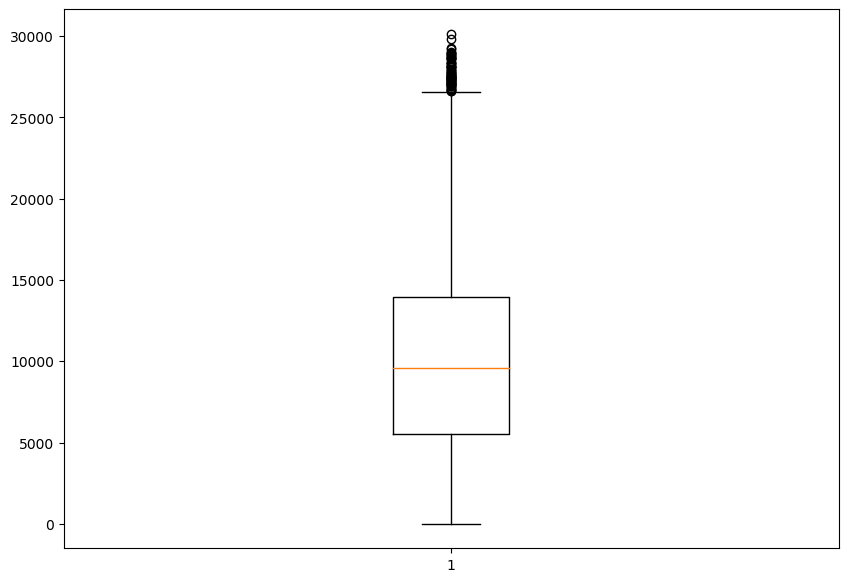

In [30]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(raw_df22['toplam_yolcu'])
 
# show plot
plt.show()

In [ ]:
#son 8 ay : 0-5 at